In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import base64
from IPython.display import HTML


In [3]:
# Crime data
crime_data = pd.read_csv("/content/drive/MyDrive/Crimenes.csv")

#Explorando el conjunto de datos.

In [4]:
crime_data.head(10)

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_data.shape

(50, 5)

In [6]:
# Summary of the data
crime_data.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Check the data types
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#Modificando el conjunto de datos.

In [8]:
# Renombrar la columna "Estado"
crime_data = crime_data.rename(columns={crime_data.columns[0]:"Estado"})
crime_data.head(10)


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#Manejo de valores faltantes.

In [9]:
crime_data.isnull().sum()

Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

In [10]:
crime_data[crime_data.duplicated()].shape

(0, 5)

In [11]:
crime_data[crime_data.duplicated()]

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones


#Explorando datos mediante visualización.

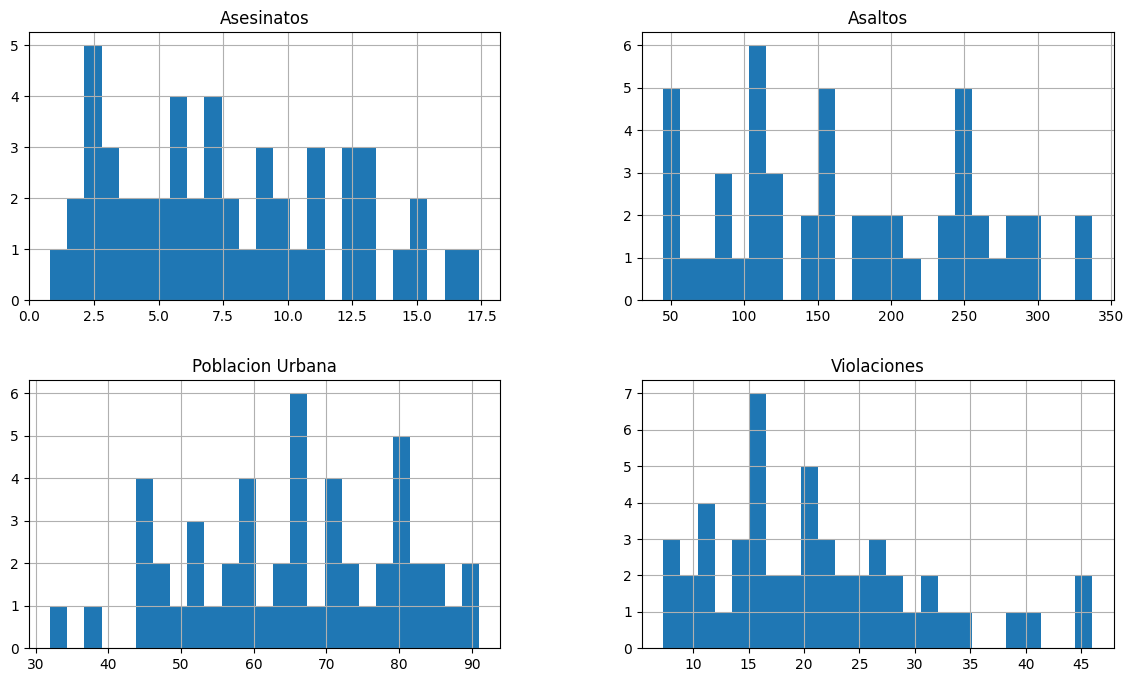

In [12]:
crime_data.hist(figsize=(14,8),bins=25)
plt.show()

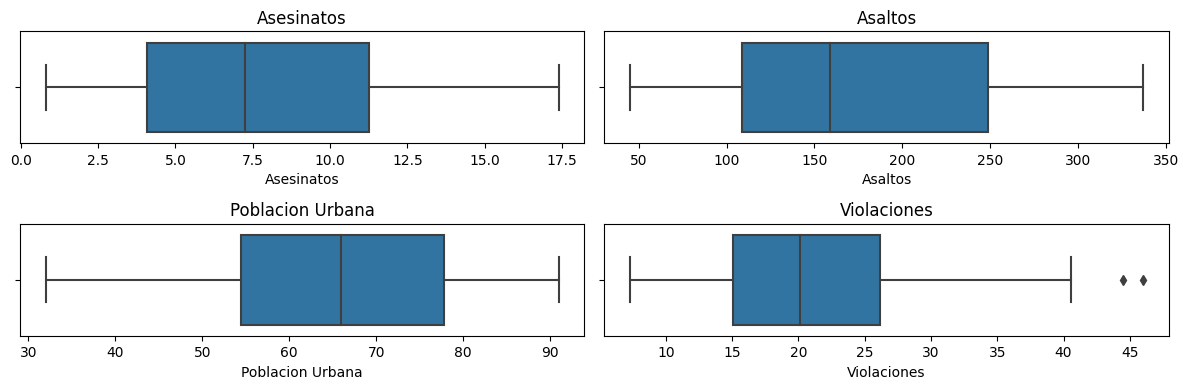

In [13]:
num_features = len(crime_data.columns[1:])
num_cols = 2
num_rows = (num_features - 1) // 2 + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

for i, feature in enumerate(crime_data.columns[1:]):
    sns.boxplot(x=crime_data[feature], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(feature)

plt.tight_layout()
plt.show()



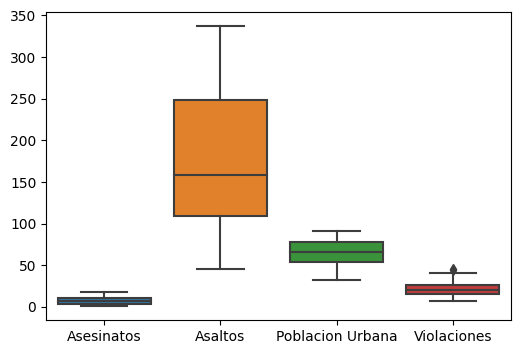

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=crime_data)
plt.show()

Podemos ver claramente que la tasa de crímenes de asalto es alta, seguida por la tasa de crímenes de violación y asesinato.

Comprobando la correlación entre variables

In [15]:
crime_data.corr()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
Asesinatos,1.000000,0.801873,0.069573,0.563579
Asaltos,0.801873,1.000000,0.258872,0.665241
Poblacion Urbana,0.069573,0.258872,1.000000,0.411341
Violaciones,0.563579,0.665241,0.411341,1.000000


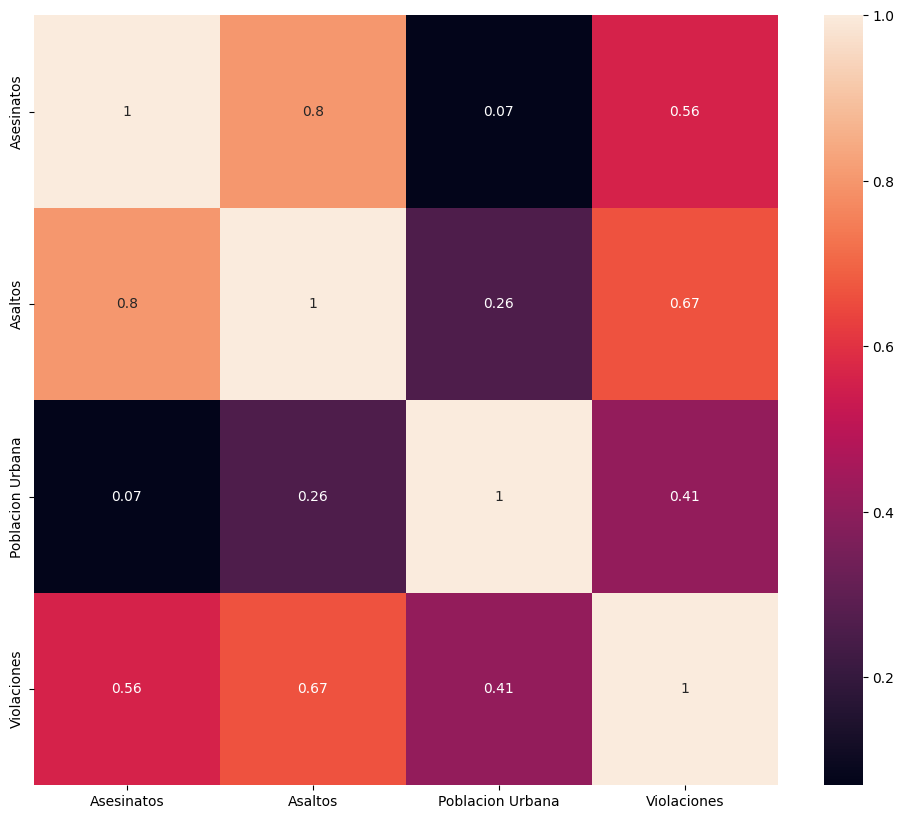

In [16]:
plt.figure(figsize=(12,10))
sb.heatmap(crime_data.corr(),annot=True)
plt.show()

Podemos observar que la población 'Urbana' no influye mucho en la tasa de asaltos y asesinatos. Sin embargo, puede ser una razón para la tasa de violación.
Pero la tasa de asesinatos y la tasa de violación están fuertemente correlacionadas con la tasa de asaltos.

#Visualizando características por Estado

In [17]:
pio.renderers.default = 'colab'
num_features = len(crime_data.columns[1:])
num_rows = num_features // 2 + num_features % 2
num_cols = 2
figs = []

for i, feature in enumerate(crime_data.columns[1:]):
    fig = px.bar(crime_data, x='Estado', y=feature, title="Tasa de " + str(feature) + " por estado",
                 labels={'Estado': 'Estado', feature: 'Tasa'},
                 category_orders={feature: crime_data.sort_values(feature).Estado.unique()})

    fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"))
    figs.append(fig)

for fig in figs:
    fig.show()



* En Florida, la tasa de asesinatos y la tasa de asaltos son altas.
* En California, la población urbana es alta, lo que provoca que la tasa de violación también sea alta. Pero en otros estados, no vemos mucha similitud.
* Dakota del Norte tiene la tasa de crímenes más baja y la población urbana también es menor.
* Vermont, con la población urbana más baja, tiene la tasa de asesinatos y la tasa de asaltos más bajas.


**3.Preprocesamiento de datos**




**3.1: Estandarizando los datos**

In [18]:
crime_data_mdf = crime_data.drop(['Estado'],axis=1)
crime_data_mdf.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [19]:
standard_scaler = StandardScaler()
crime_data_std = standard_scaler.fit_transform(crime_data_mdf)
crime_data_std.shape

(50, 4)

**3.2: Normalizando los datos**

In [20]:
min_max = MinMaxScaler()
crime_data_norm = min_max.fit_transform(crime_data_mdf)
crime_data_norm.shape

(50, 4)

**4: Construir un modelo de agrupamiento para los datos estandarizados**

**4.1: Utilizando un modelo de agrupamiento jerárquico**

**4.1.1: Creando el enlace para determinar el número de clústeres**

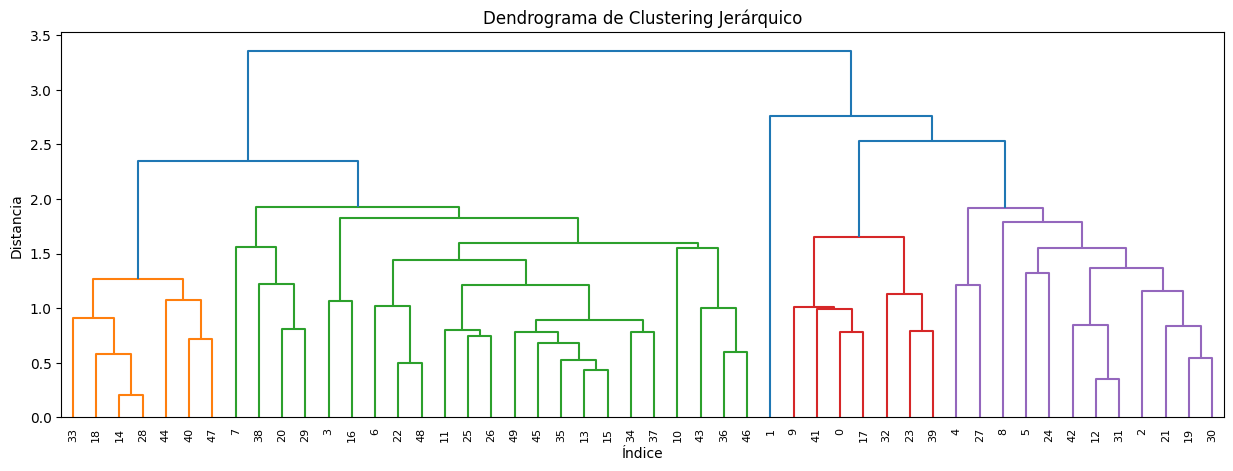

In [21]:
# Calcular el enlace jerárquico utilizando el método de enlace promedio y la métrica euclidiana
z = linkage(crime_data_std, method="average", metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice')
plt.ylabel('Distancia')
dendrogram(z)
plt.show()


Aquí podemos ver que hay 5 clústeres.

**4.1.2: Construyendo el modelo de agrupamiento**

Antes de seleccionar el número de clústeres, verifica la puntuación de silueta variando el número de clústeres en la construcción del modelo. La puntuación de silueta proporciona la precisión de un modelo.

In [22]:
# Iterar sobre un rango de valores de clusters (de 2 a 5)
for nc in range(2, 6):
    # Ajustar el modelo de clustering jerárquico aglomerativo
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average', affinity="euclidean").fit(crime_data_std)

    # Obtener las etiquetas de cluster asignadas a cada observación
    cluster_labels = pd.Series(h_cluster.labels_)

    # Calcular el coeficiente de silueta promedio
    silhouette_score = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)

    print(f"For n_clusters = {nc}, the average silhouette_score is: {silhouette_score}")


For n_clusters = 2, the average silhouette_score is: 0.4084890326217641
For n_clusters = 3, the average silhouette_score is: 0.34863679190476177
For n_clusters = 4, the average silhouette_score is: 0.3636819420151221
For n_clusters = 5, the average silhouette_score is: 0.3212682619092323


El modelo con 4 clústeres tiene la mayor precisión. Por lo tanto, construye el modelo con 4 clústeres.

In [23]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average', affinity="euclidean").fit(crime_data_std)
cluster_labels = pd.Series(h_cluster.labels_)
crime_data['clust'] = cluster_labels
crime_data


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


**4.1.3: Analizando los resultados obtenidos del modelo**

In [24]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


Podemos ver que se forman 4 clusters

A continuación se encuentran los diferentes estados en cada clúster.

In [25]:
h_cluster_0 = crime_data[(crime_data.clust==0)]
h_cluster_0

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [26]:
h_cluster_1 = crime_data[(crime_data.clust==1)]
h_cluster_1

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [27]:
h_cluster_2 = crime_data[(crime_data.clust==2)]
h_cluster_2

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
1,Alaska,10.0,263,48,44.5,2


In [28]:
h_cluster_3 = crime_data[(crime_data.clust==3)]
h_cluster_3

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


* Podemos observar que el Cluster-2 contiene solo una observación, que es el estado de 'Alaska'.
* Alaska tiene una baja tasa de población urbana, pero tiene una alta tasa de violación en comparación con el estado de 'South Carolina' del Cluster-3, que tiene la misma tasa de población urbana. Esta es la razón por la cual se destaca de todos los clústeres.

<Figure size 960x480 with 0 Axes>

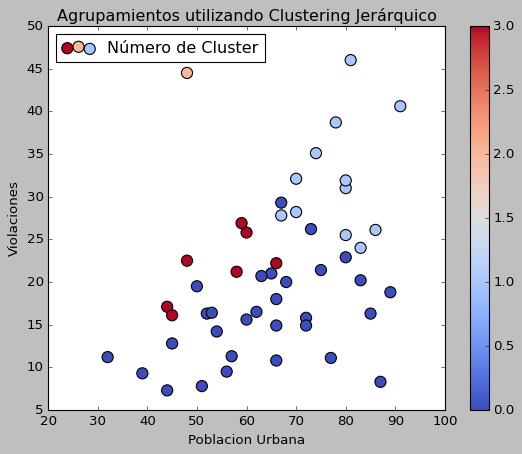

In [29]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Poblacion Urbana", y="Violaciones", c=cluster_labels, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering Jerárquico')
plt.show()


* Podemos ver los diferentes clústeres indicados en diferentes colores.
* Como se mencionó anteriormente, la observación del Cluster-2 es completamente diferente, con una baja tasa de población urbana y una alta tasa de violación.

<Figure size 960x480 with 0 Axes>

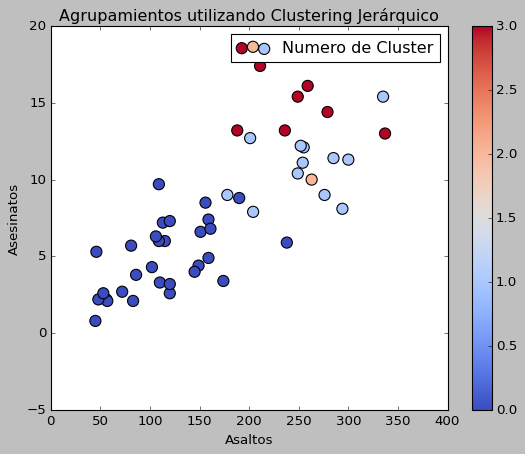

In [30]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Asaltos",y ="Asesinatos",c=cluster_labels,label = 'Numero de Cluster',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering Jerárquico')
plt.show()

Podemos ver que algunas de las observaciones de un clúster se superponen con el otro clúster. Entonces, comprobemos la precisión del modelo en la clasificación de datos evaluando la puntuación de silueta.


Evaluando la precisión del modelo utilizando la puntuación de silueta.

In [31]:
# El puntaje de silueta varía de -1 a 1. '-1' indica que el modelo no es bueno. '1' indica que el modelo es el mejor.
# '0' indica que los clusters se superponen.
slht_scr_hc = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
slht_scr_hc


0.3636819420151221

La puntuación está más cerca de '0'. Indica que el modelo no es muy preciso al clasificar los datos, ya que los clústeres se superponen. Por lo tanto se probaran otros métodos de agrupamiento.

**4.2 Usando el modelo de Clustering K-means**

**4.2.1: Determinando el número de clústeres utilizando el método del 'Codo'**

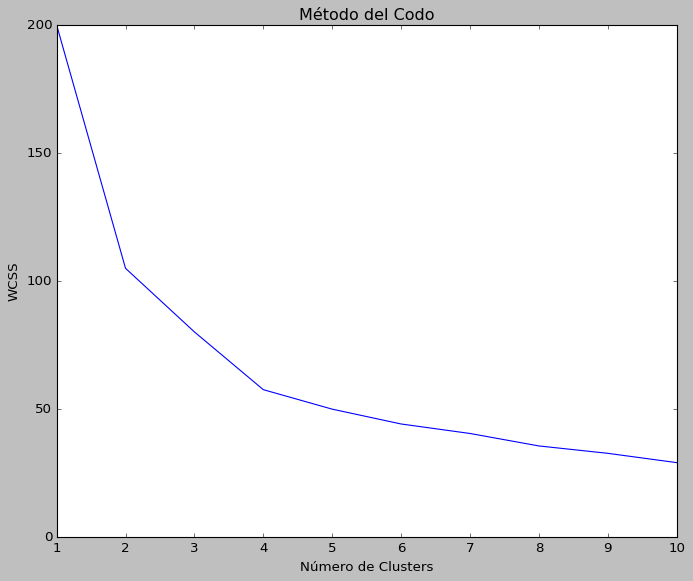

In [32]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(crime_data_std)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('Método del Codo')
plt.ylabel('WCSS')
plt.xlabel('Número de Clusters')
plt.show()


A partir de la curva del codo, podemos observar que el número de clústeres es 5.

**4.2.2: Construyendo el modelo de Clustering**

In [33]:
# El puntaje de silueta varía de -1 a 1. '-1' indica que el modelo no es bueno. '1' indica que el modelo es el mejor.
# '0' indica que los clusters se superponen.
for nc in range(2, 6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(crime_data_std)
    slht_scr = sklearn.metrics.silhouette_score(crime_data_std, y1_kmeans)
    print("Para n_clusters =", nc, "El puntaje de silueta promedio es:", slht_scr)


Para n_clusters = 2 El puntaje de silueta promedio es: 0.4084890326217641
Para n_clusters = 3 El puntaje de silueta promedio es: 0.3095091512791688
Para n_clusters = 4 El puntaje de silueta promedio es: 0.33968891433344395
Para n_clusters = 5 El puntaje de silueta promedio es: 0.30612803169146263


El modelo con 4 clusters tiene la mayor precisión. Por lo tanto, construiremos el modelo con 4 clusters.

In [34]:
k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(crime_data_std)

In [35]:
y_kmeans

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [36]:
k_cluster.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [37]:
k_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [38]:
# Suma de cuadrados dentro del clúster o varianza
k_cluster.inertia_


57.55425863091105

In [39]:
ks = pd.Series(y_kmeans)
crime_data['clust']=ks
crime_data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


**4.2.3: Analizando los resultados obtenidos del modelo**

In [40]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
clust,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.0
1,3.600000,78.538462,52.076923,12.176923,1.0
2,10.815385,257.384615,76.000000,33.192308,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


A continuación se encuentran los diferentes estados en cada clúster.

In [41]:
k_cluster_0 = crime_data[(crime_data.clust==0)]
k_cluster_0

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [42]:
k_cluster_1 = crime_data[(crime_data.clust==1)]
k_cluster_1

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [43]:
k_cluster_2 = crime_data[(crime_data.clust==2)]
k_cluster_2

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [44]:
k_cluster_3 = crime_data[(crime_data.clust==3)]
k_cluster_3

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Figure size 960x480 with 0 Axes>

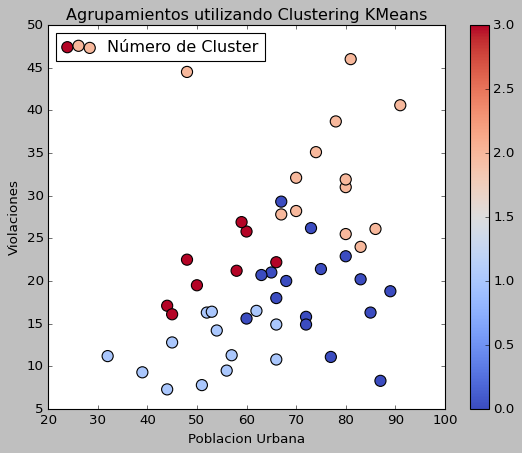

In [45]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Poblacion Urbana", y="Violaciones", c=k_cluster.labels_, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering KMeans')
plt.show()


<Figure size 960x480 with 0 Axes>

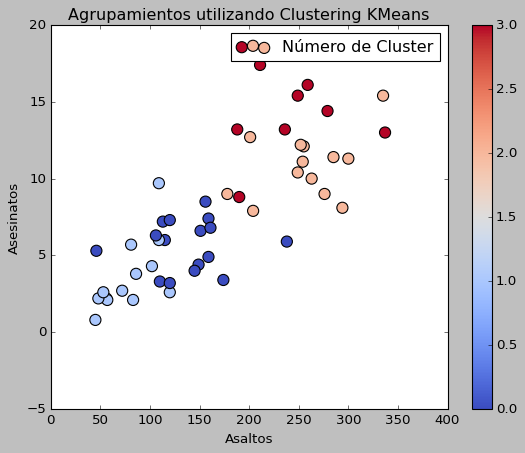

In [46]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Asaltos", y="Asesinatos", c=k_cluster.labels_, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering KMeans')
plt.show()


Podemos observar que algunas de las observaciones de un clúster se superponen con el otro clúster.

Evaluando la precisión del modelo utilizando el puntaje de silueta.

In [47]:
# El puntaje de silueta varía de -1 a 1. '-1' indica que el modelo no es bueno. '1' indica que el modelo es el mejor.
# '0' indica que los clusters se superponen.
slht_scr_kc = sklearn.metrics.silhouette_score(crime_data_std, k_cluster.labels_)
slht_scr_kc


0.33968891433344395

La puntuación está más cerca de '0'. Esto indica que el modelo no es tan preciso en la clasificación de los datos, ya que los clústeres se superponen. Así que intenta otros métodos de clustering.

**4.3: Modelo de Clustering DBSCAN**

**4.3.1: Determinando el valor de épsilon**

In [48]:
# Vecinos más cercanos = 2x(número de dimensiones/columnas)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_data_std)
distancias, índices = nn.kneighbors(crime_data_std)


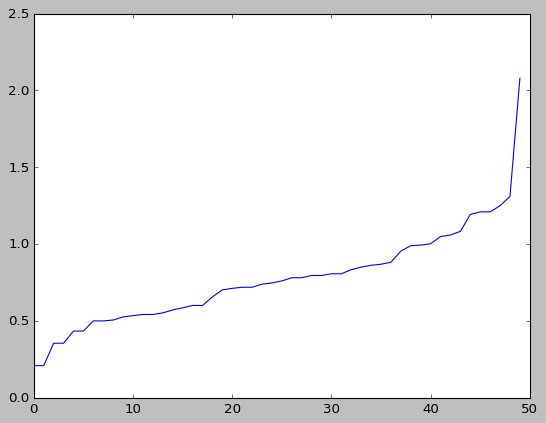

In [49]:
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, 1]
plt.plot(distancias)


La curva tomó un giro pronunciado en un valor de 1.25. Por lo tanto, el valor de épsilon es 1.25.

**4.3.2: Construyendo el modelo de Clustering DBSCAN**

In [50]:
# min_samples=(número de dimensiones/columnas) + 1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_data_std)


DBSCAN(eps=1.25)

In [51]:
d_cluster.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [52]:
ds = pd.Series(d_cluster.labels_)
crime_data['clust']=ds
crime_data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


**4.3.3: Analizando los resultados obtenidos del modelo**

In [53]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


A continuación se encuentran los diferentes estados en cada clúster

In [54]:
d_cluster_neg1 = crime_data[(crime_data.clust==-1)]
d_cluster_neg1

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


Los clústeres con la etiqueta '-1' generalmente se categorizan como valores atípicos.

In [55]:
d_cluster_0 = crime_data[(crime_data.clust==0)]
d_cluster_0

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [56]:
d_cluster_1 = crime_data[(crime_data.clust==1)]
d_cluster_1

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [57]:
d_cluster_2 = crime_data[(crime_data.clust==2)]
d_cluster_2

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

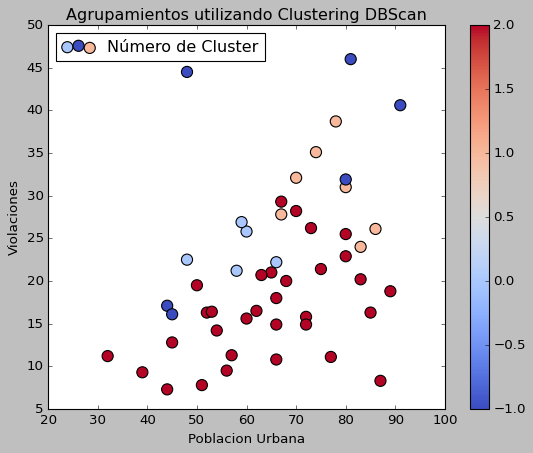

In [58]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Poblacion Urbana", y="Violaciones", c=d_cluster.labels_, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering DBScan')
plt.show()


<Figure size 960x480 with 0 Axes>

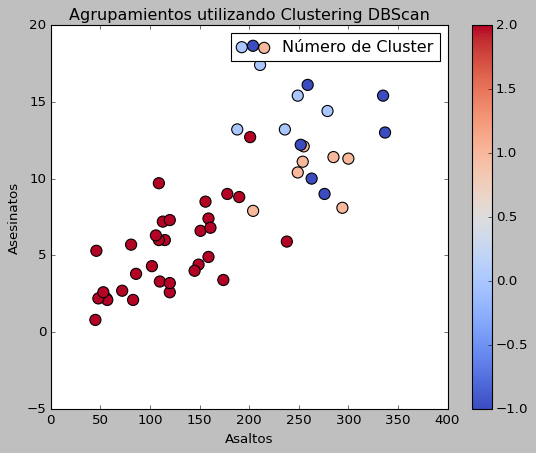

In [59]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Asaltos", y="Asesinatos", c=d_cluster.labels_, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering DBScan')
plt.show()


Podemos ver que algunas de las observaciones de un clúster se superponen con el otro clúster. Así que verifiquemos la precisión del modelo en la clasificación de datos evaluando el puntaje de silueta.







Evaluando la precisión del modelo utilizando el puntaje de silueta

In [60]:
# El puntaje de silueta varía de -1 a 1. '-1' indica que el modelo no es bueno. '1' indica que el modelo es el mejor.
# '0' indica que los clústeres se superponen.
slht_scr_dc = sklearn.metrics.silhouette_score(crime_data_std, d_cluster.labels_)
slht_scr_dc


0.23869670053300915

La puntuación de Silhouette considerando 4 grupos de grupos está más cerca de '0'. Por lo tanto, el modelo de agrupación en clústeres de DB Scan no puede clasificar el conjunto de datos con precisión

**5: Comparando todos los modelos usando la traducción de puntuación de Silhouette**

In [61]:
print("El puntaje de silueta del Clustering Jerárquico:", slht_scr_hc)
print("El puntaje de silueta del Clustering KMeans:", slht_scr_kc)
print("El puntaje de silueta del Clustering DBScan:", slht_scr_dc)


El puntaje de silueta del Clustering Jerárquico: 0.3636819420151221
El puntaje de silueta del Clustering KMeans: 0.33968891433344395
El puntaje de silueta del Clustering DBScan: 0.23869670053300915


**6 : Conclusion**

Por lo tanto, se puede seleccionar el modelo de agrupamiento jerárquico para clasificar el conjunto de datos.

<Figure size 960x480 with 0 Axes>

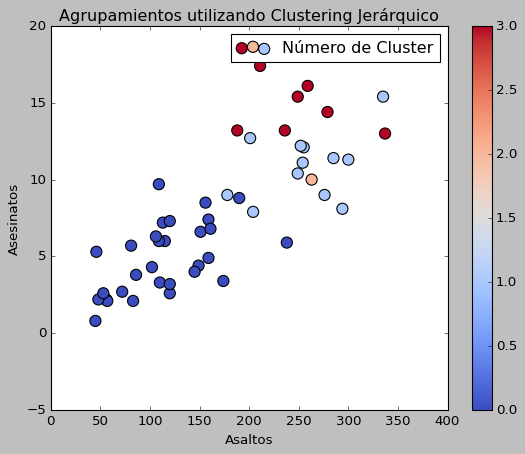

In [62]:
plt.style.use(['classic'])
plt.figure(figsize=(12, 6))
crime_data.plot(x="Asaltos", y="Asesinatos", c=cluster_labels, label='Número de Cluster', kind="scatter", s=100, cmap=plt.cm.coolwarm)
plt.title('Agrupamientos utilizando Clustering Jerárquico')
plt.show()


* Los estados en el Cluster-0 tienen tasas de asesinato, asalto y violación más bajas y se pueden considerar como una Zona Segura.

* Los estados en el Cluster-1 tienen tasas de criminalidad moderadas y se pueden considerar como una Zona Moderada.

* Los estados en el Cluster-3 tienen tasas de criminalidad altas y se pueden considerar como una Zona de Peligro.

#Panel interactivo de Tableau

In [63]:
%%HTML
<div class='tableauPlaceholder' id='viz1558006161579' style='position: relative'>
<noscript>
<a href='#'>
<img alt=' 'src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1_rss.png' style='border: none' /></a>
</noscript>
<object class='tableauViz'style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F'/>
<param name='embed_code_version' value='3' />
<param name='site_root' value=''/>
<param name='name' value='USCrimeRatesClusters&#47;Dashboard'/>
<param name='tabs' value='no' />
<param name='toolbar' value='yes'/>
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes'/>
<param name='display_spinner' value='yes'/>
<param name='display_overlay' value='yes'/>
<param name='display_count' value='yes' />
</object>
</div>
<script type='text/javascript'>var divElement = document.getElementById('viz1558006161579');var vizElement = divElement.getElementsByTagName('object')[0];vizElement.style.width='700px';vizElement.style.height='527px';var scriptElement = document.createElement('script');scriptElement.src ='https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement);</script>